In [1]:
import minitorch.engine

# VISUALIZATION FUNCTION

In [2]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v.getChildren():
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n.getOperation():
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n.getOperation(), label = n.getOperation())
      # and connect this node to it
      dot.edge(uid + n.getOperation(), uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.getOperation())

  return dot

# TESTS

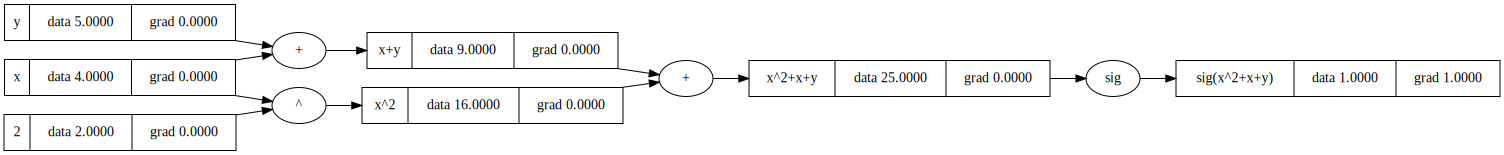

In [8]:
x = Value(4, label="x")
y = Value(5, label="y")

a = x ** 2
b = x + y

f = a + b

g = f.sigmoid()

g.backward()
draw_dot(g)